## Aprendizado Não-supervisionado

Material baseado nas aulas de aprendizado não-supervisionado do Datacamp e do repositório https://github.com/benjaminwilson/python-clustering-exercises.

O aprendizado não-supervisionado é uma importante ferramenta de inteligência artificial porque não depende da anotação de dados feitas por humanos, o que normalmente é um processo caro e lento. Nas células seguintes, vamos analisar alguns conjuntos de dados e algumas opções de agrupamento, que é uma forma de aprendizado não-supervisionado.

O agrupamento, como o próprio nome já diz, é uma estratégia para formar grupos nos dados e facilitar ou até mesmo possibilitar o entendimento de quais características são comuns aos grupos. Nos exemplos a seguir, ficará mais fácil entender o potencial dessas técnicas.

[1] Considere um conjunto de dados carregados utilizando a biblioteca Pandas.

In [1]:
import pandas as pd

df = pd.read_csv('datasets/ch1ex1.csv')
points = df.values

[2] Em seguida, vamos utilizar a biblioteca Matplotlib para visualizar a distribuição desses dados no espaço 2-D.

In [2]:
import matplotlib.pyplot as plt
xs = points[:,0]
ys = points[:,1]
plt.scatter(xs, ys)

**Quantos grupos têm? Como nós definimos um grupo?**

[3] Realizando agrupamento com o algoritmo K-Means.

In [3]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
model.fit(points)
labels = model.predict(points)

In [4]:
labels

array([0, 2, 1, 1, 2, 2, 1, 0, 2, 2, 1, 0, 2, 1, 2, 0, 1, 1, 0, 1, 2, 0,
       2, 0, 0, 2, 0, 0, 0, 2, 1, 1, 1, 2, 0, 2, 0, 0, 2, 0, 0, 1, 2, 2,
       2, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 2, 0, 0, 2, 1, 2, 0, 0, 1, 1, 2,
       1, 2, 2, 0, 1, 2, 1, 0, 1, 2, 0, 0, 0, 1, 0, 2, 1, 2, 2, 2, 2, 0,
       0, 1, 2, 1, 2, 0, 0, 0, 1, 2, 2, 1, 2, 0, 2, 1, 0, 1, 1, 1, 2, 2,
       0, 2, 1, 2, 2, 2, 0, 2, 1, 1, 0, 0, 0, 0, 0, 2, 1, 0, 2, 2, 1, 1,
       2, 0, 2, 0, 1, 2, 1, 0, 1, 1, 0, 1, 1, 0, 1, 2, 0, 0, 0, 1, 1, 2,
       1, 2, 0, 0, 1, 2, 1, 1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 1, 0, 0, 2, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 2, 1, 0, 0, 0, 0, 2, 1, 0, 2, 2, 2,
       0, 2, 0, 0, 2, 1, 1, 0, 1, 0, 0, 2, 2, 0, 1, 2, 1, 0, 1, 2, 0, 2,
       2, 2, 2, 1, 1, 1, 0, 0, 2, 0, 1, 2, 0, 0, 2, 0, 1, 1, 1, 1, 1, 2,
       0, 0, 1, 1, 0, 2, 1, 2, 2, 0, 0, 2, 2, 2, 0, 1, 0, 2, 0, 1, 1, 1,
       1, 1, 0, 0, 2, 0, 0, 2, 1, 1, 2, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 0,
       1, 2, 2, 1, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2])

[4] Visualizando os grupos encontrados pelo K-Means

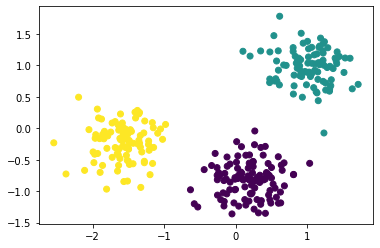

In [5]:
plt.scatter(xs, ys, c=labels)
plt.show()

**O algoritmo K-Means é baseado em centroides, e ele entende que um ponto pertence a um grupo X quando o ponto é mais próximo do centro do grupo X do que do centro dos outros grupos.**

[5] Visualizando o centro dos grupos

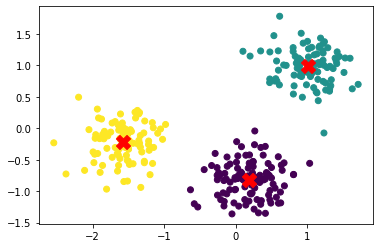

In [6]:
centroids = model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

plt.scatter(xs, ys, c=labels)
plt.scatter(centroids_x, centroids_y, marker='X', color='red', s=200)
plt.show()

**Nós sabemos que o número de grupos é 3 porque é visivelmente simples de perceber para esse conjunto de dados. Nem sempre isso é uma realidade, por conta disso, a quantidade de grupos (que é um parâmetro importante desse modelo) pode ser encontrada de maneira mais sistêmica.**

[6] Definindo o número de grupos

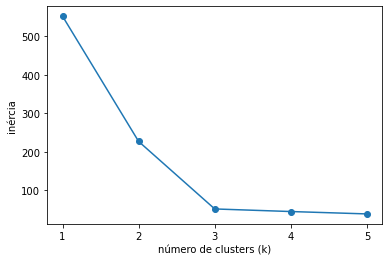

In [7]:
ks = range(1, 6)
inertias = []

for k in ks:
    
    model = KMeans(n_clusters=k)
    model.fit(points)
    
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o')
plt.xlabel('número de clusters (k)')
plt.ylabel('inércia')
plt.xticks(ks)
plt.show()

In [8]:
# calculando a maior distância

x1, y1 = 1, inertias[0]
x2, y2 = len(inertias), inertias[-1]

distances = []
for i in range(len(inertias)):
    x0 = i+1
    y0 = inertias[i]
    numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
    denominator = ((y2 - y1)**2 + (x2 - x1)**2)**0.5
    distances.append(numerator/denominator)

optimal_k = distances.index(max(distances)) + 1

print('Melhor número de grupos:', optimal_k)

Melhor número de grupos: 3


**Matematicamente, o melhor número de grupos é aquele que se apresenta mais distante da reta entre a inércia do menor número de grupos e do maior número. Mais detalhes podem ser encontrados nesse post: https://medium.com/pizzadedados/kmeans-e-metodo-do-cotovelo-94ded9fdf3a9**

---

### Case 1: Tipos de grãos

Também é possível trabalhar com dados anotados por humanos e verificar se os agrupamentos encontrados pelo K-Means são coerentes com as anotações. Ou seja, se os valores observados contribuem para um bom agrupamento.

[7] Carregando dados de grãos

In [9]:
seeds_df = pd.read_csv('datasets/seeds.csv')

varieties = list(seeds_df['grain_variety']) # tipo de grao anotado
del seeds_df['grain_variety'] # remove para nao causar data leakage

samples = seeds_df.values

In [10]:
model = KMeans(n_clusters=3)
labels = model.fit_predict(samples)
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 2 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 1 1 1 1 2 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [11]:
df = pd.DataFrame({'labels': labels, 'varieties': varieties})
ct = pd.crosstab(df['labels'], df['varieties'])
ct

varieties,Canadian wheat,Kama wheat,Rosa wheat
labels,,,
0,68,9,0
1,2,60,10
2,0,1,60


**O que se percebe é que os agrupamentos funcionam muito bem, com pouquíssimos eros para Canadian wheat, e um pouco mais para as outras. Outro ponto que cabe aqui é observar que o número de grupos não é um mistério porque se sabe, de antemão, quantos grupos existem. Mas e para visualizar esses dados?**

[8] Visualizando dados multivariados.

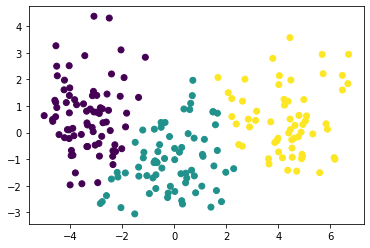

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
samples_pca = pca.fit_transform(samples)

xs = samples_pca[:,0]
ys = samples_pca[:,1]
plt.scatter(xs, ys, c=labels)
plt.show()

**A aplicação do PCA, que também é um método não-supervisionado, auxilia na redução de dimensionalidade sem perder a variância dos dados. Nesse sentido, ele consegue representar os dados em menos dimensões, mantendo a variância, ao criar informações artificiais.**

---

Será que é possível melhorar ainda os resultados? Aqui temos duas opções: verificar se com os dados em dimensão menor o agrupamento funciona melhor (aplicar o PCA e depois o K-Means) e verificar se a escala dos dados precisa de padronização; e, por fim, testar todas essas coisas juntas.

[9] PCA + K-Means

In [13]:
pca = PCA(n_components=2)
new_samples = pca.fit_transform(samples)

model = KMeans(n_clusters=3)
labels = model.fit_predict(new_samples)

df = pd.DataFrame({'labels': labels, 'varieties': varieties})
ct = pd.crosstab(df['labels'], df['varieties'])
ct

varieties,Canadian wheat,Kama wheat,Rosa wheat
labels,,,
0,0,1,60
1,68,9,0
2,2,60,10


**Temos o mesmo problema, uma diferença substancial entre os erros do Canadian wheat e das restantes. No entanto, cabe observar que como agora são utilizadas apenas 2 dimensões em vez do número anterior, o processo é mais rápido.**

[10] Padronização + K-Means

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
new_samples = scaler.fit_transform(samples)

model = KMeans(n_clusters=3)
labels = model.fit_predict(new_samples)

df = pd.DataFrame({'labels': labels, 'varieties': varieties})
ct = pd.crosstab(df['labels'], df['varieties'])
ct

varieties,Canadian wheat,Kama wheat,Rosa wheat
labels,,,
0,66,6,0
1,4,62,5
2,0,2,65


**Nessa condição aumentou o erro da primeira classe, diminuiu da segunda e terceira. Essa configuração então traz melhores resultados.**

[11] Padronização + PCA + K-Means

In [15]:
from sklearn.pipeline import make_pipeline

pipe = make_pipeline( StandardScaler(), PCA(n_components=2) )
new_samples = pipe.fit_transform(samples)

model = KMeans(n_clusters=3)
labels = model.fit_predict(new_samples)

df = pd.DataFrame({'labels': labels, 'varieties': varieties})
ct = pd.crosstab(df['labels'], df['varieties'])
ct


varieties,Canadian wheat,Kama wheat,Rosa wheat
labels,,,
0,0,2,65
1,4,63,5
2,66,5,0


**O ganho é ainda maior utilizando a combinação de padronização e redução de dimensionalidade.**

[12] Visualização do novo espaço dimensional.

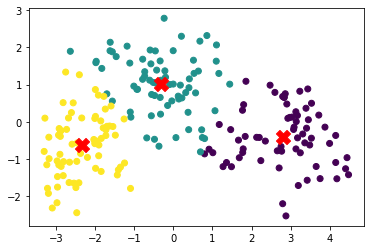

In [16]:
centroids = model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

xs = new_samples[:,0]
ys = new_samples[:,1]
plt.scatter(xs, ys, c=labels)
plt.scatter(centroids_x, centroids_y, marker='X', color='red', s=200)
plt.show()

---

### Case 2: Movimento de ações da Bolsa de Valores

Vamos observar um conjunto de ações e utilizar agrupamento para perceber quais ações tem movimentos semelhantes. Nesse conjunto, há apenas um registro por empresa com a informação das ações por vários dias. Nesse caso, não se sabe o número de grupos ideal.

[13] Carregando os dados das ações.

In [17]:
fn = 'datasets/company-stock-movements-2010-2015-incl.csv'
stocks_df = pd.read_csv(fn, index_col=0)

In [18]:
stocks_df.head()

,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,-4.999995,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,-0.500000,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,-2.039994,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,-0.130001,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,-0.709999,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


[14] Separar as empresas dos outros dados 

In [19]:
companies = list(stocks_df.index)
movements = stocks_df.values

[15] Verificar qual o número ideal de grupos.

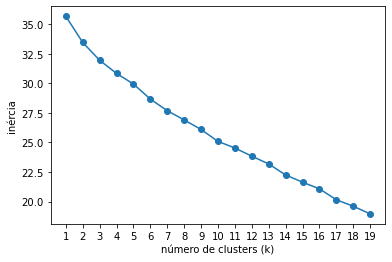

In [20]:
from sklearn.preprocessing import Normalizer

ks = range(1, 20)
inertias = []

for k in ks:
    
    model = make_pipeline(Normalizer(), KMeans(n_clusters=k))
    model.fit(movements)
    
    inertias.append(model[1].inertia_)
    
plt.plot(ks, inertias, '-o')
plt.xlabel('número de clusters (k)')
plt.ylabel('inércia')
plt.xticks(ks)
plt.show()

In [21]:
x1, y1 = 1, inertias[0]
x2, y2 = len(inertias), inertias[-1]

distances = []
for i in range(len(inertias)):
    x0 = i+1
    y0 = inertias[i]
    numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
    denominator = ((y2 - y1)**2 + (x2 - x1)**2)**0.5
    distances.append(numerator/denominator)

optimal_k = distances.index(max(distances)) + 1

print('Melhor número de grupos:', optimal_k)

Melhor número de grupos: 7


[16] Aplicando o número ideal ao algoritmo de agrupamentos.

In [22]:
model = make_pipeline(Normalizer(), KMeans(n_clusters=8)) # alterar o valor nessa linha
labels = model.fit_predict(movements)
df = pd.DataFrame({'labels': labels, 'companies': companies})
df.sort_values('labels')

,labels,companies
0,0,Apple
2,0,Amazon
17,0,Google/Alphabet
52,1,Unilever
46,1,Sanofi-Aventis
39,1,Pfizer
37,1,Novartis
30,1,MasterCard
25,1,Johnson & Johnson
20,1,Home Depot


---

### Case 3: Peixes

O terceiro case é com vocês. O que você consegue descobrir com agrupamento nesse conjunto?

In [23]:
df = pd.read_csv('datasets/fish.csv')

species = list(df['species'])
del df['species']

samples = df.values